<a href="https://colab.research.google.com/github/bbucalonserra/machine_learning_and_analytics/blob/main/Project_Delay_Deliveries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Analytics

## Professors Tatiana Escovedo and Hugo Villamizar

## 1 Problem Definition

**Today, one of the major problems faced by delivery companies is DELAYED DELIVERIES**. In light of this, the idea emerged to create a predictive analysis using machine learning models to anticipate whether a delivery will be delayed or not based on the data collected from orders. **There are no solid premises regarding the reasons for delays**, only that, given that the datasets used are in a snowflake schema, **a filter was applied to analyze only motorcyclists, always in the food segment, with delivery status always marked as delivered and order status as finalized.**


**The snowflake schema can be seen in the image below.**



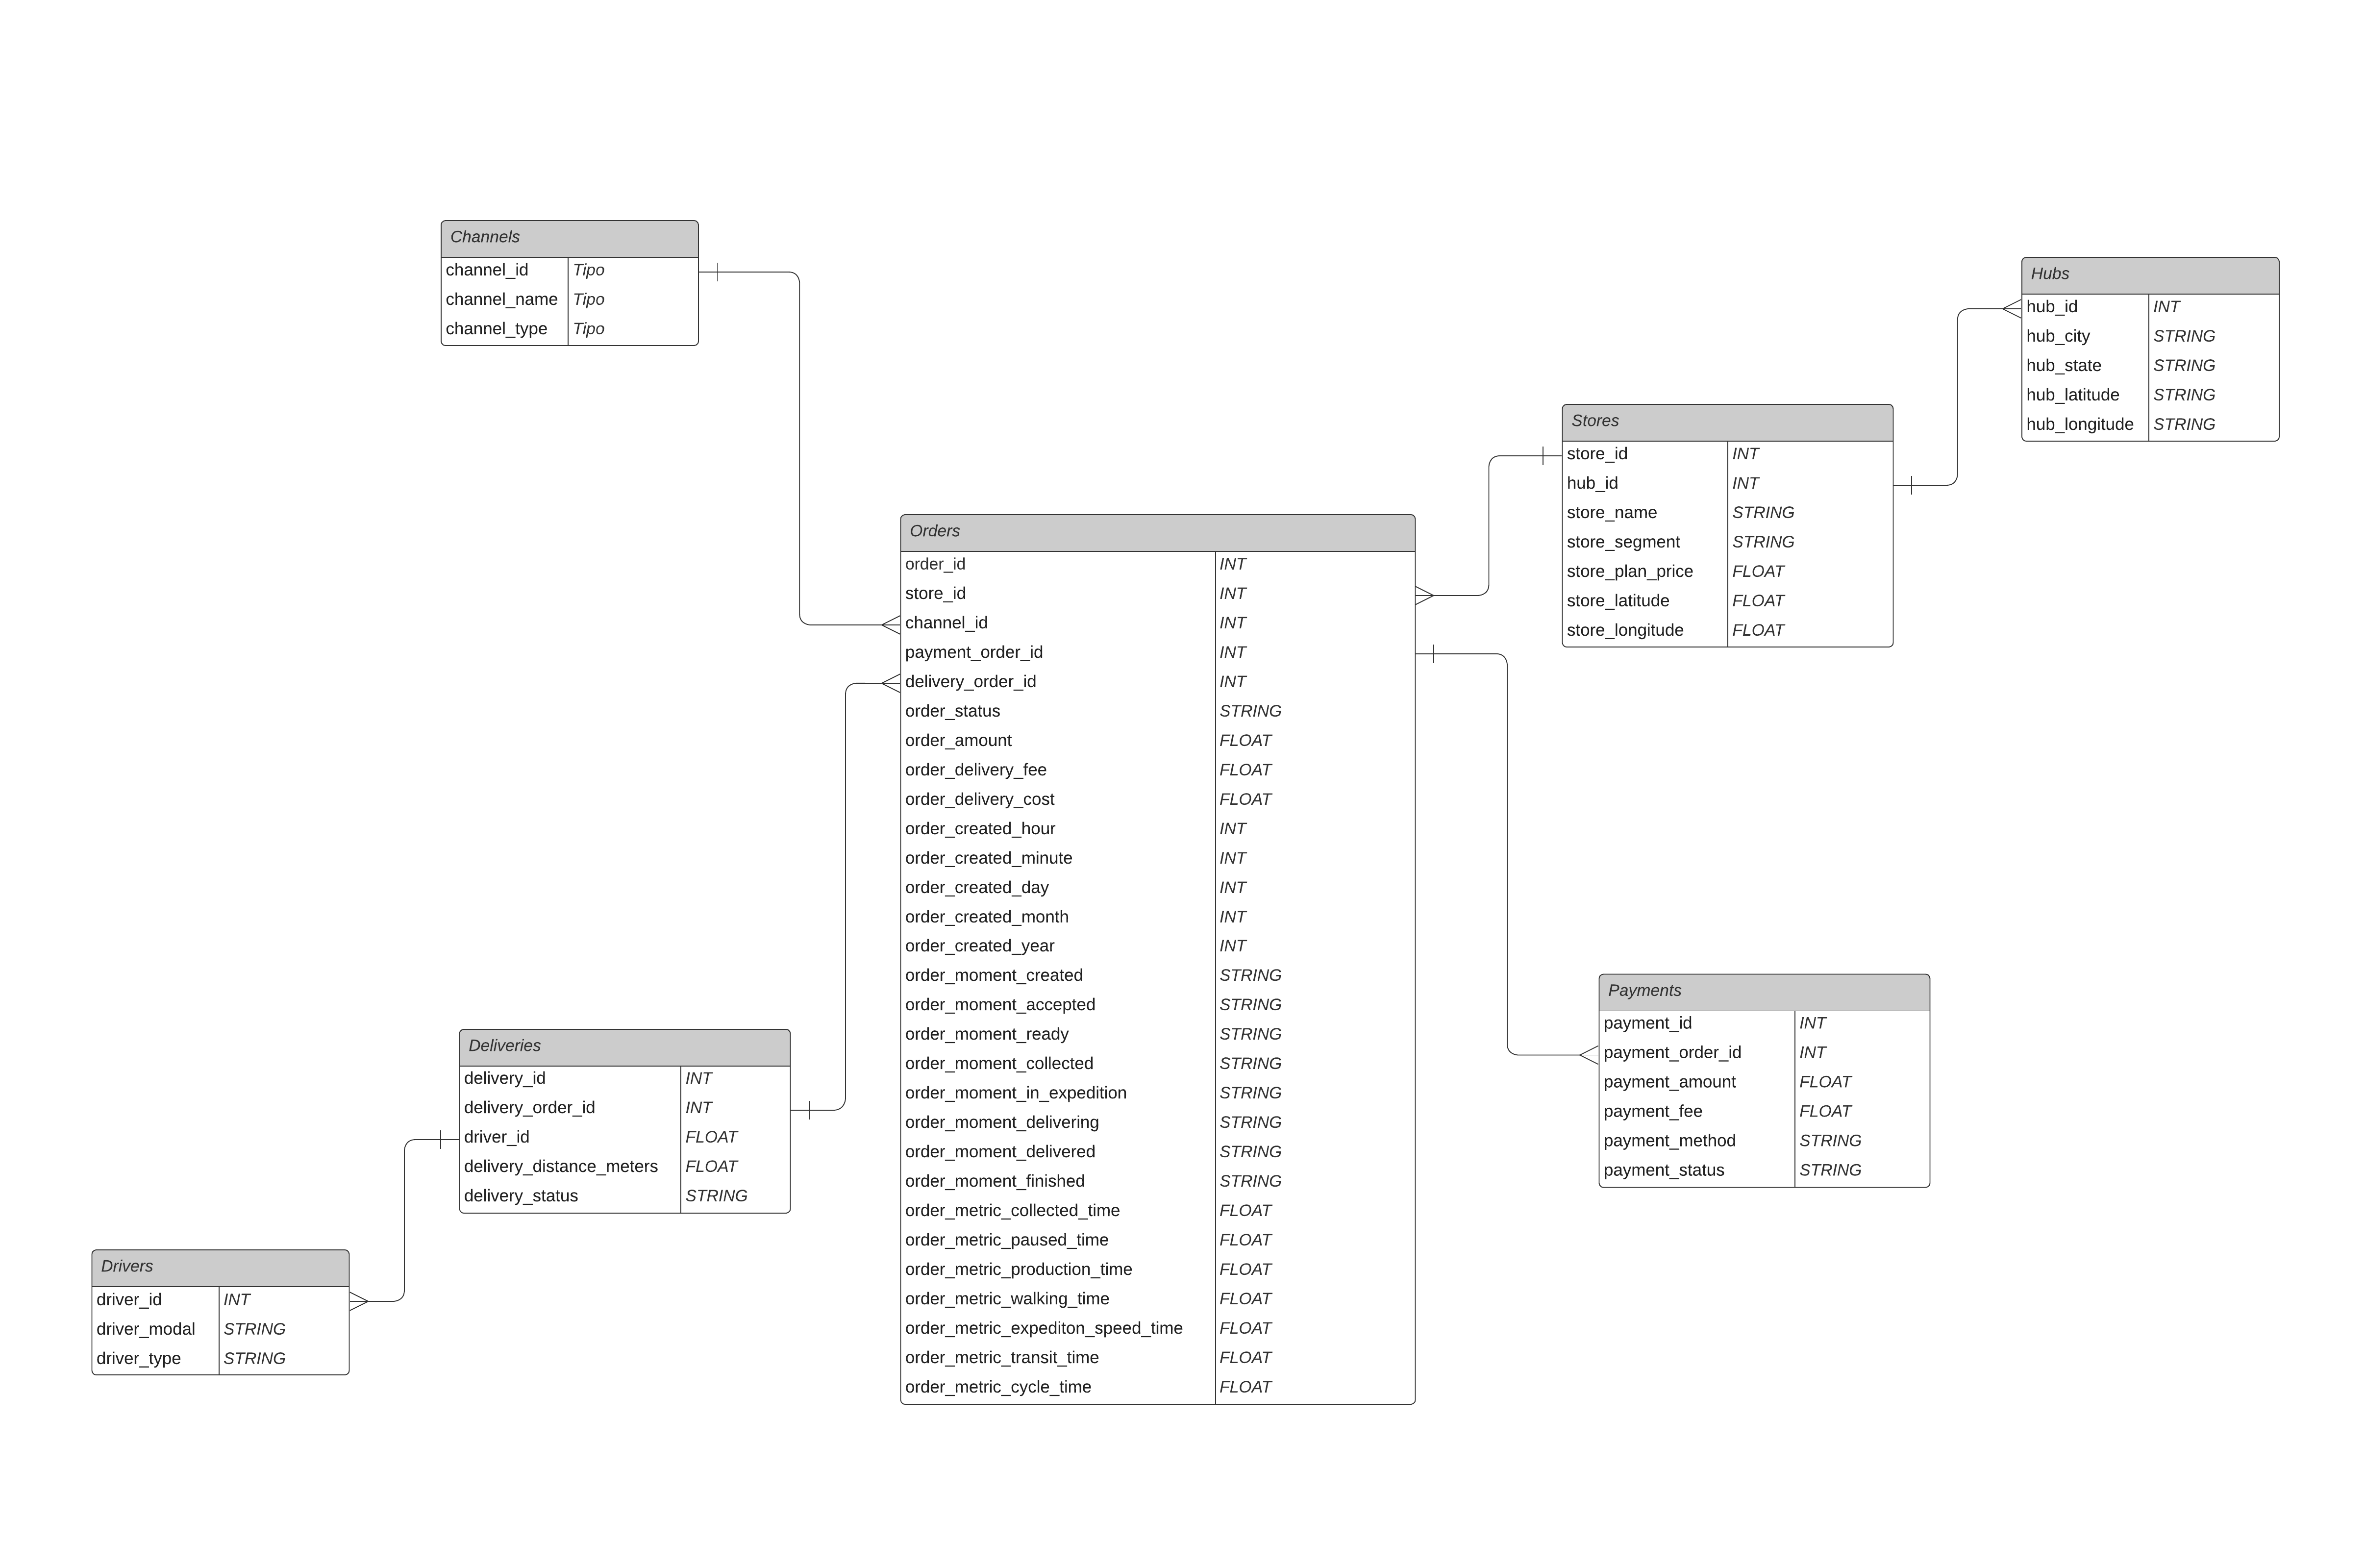

**NOTE:** The schema was created using the [Lucid App](https://www.lucidchart.com/pages) application.

**Below you can check what each attribute represents.**


| Dataset       | Column                        | Description                                            | Data Type |
|---------------|-------------------------------|--------------------------------------------------------|-----------|
| channels_df   | channel_id                    | Unique identifier for each channel                     | INT       |
|               | channel_name                  | Name of the channel                                    | STRING    |
|               | channel_type                  | Type of the channel (e.g., online, retail)            | STRING    |
| deliveries_df| delivery_id                   | Unique identifier for each delivery                    | INT       |
|               | delivery_order_id             | Identifier for the order associated with the delivery  | INT       |
|               | driver_id                     | Identifier for the driver assigned to the delivery     | FLOAT     |
|               | delivery_distance_meters      | Distance covered in meters for the delivery            | FLOAT     |
|               | delivery_status               | Status of the delivery (e.g., pending, delivered)     | STRING    |
| drivers_df    | driver_id                     | Unique identifier for each driver                      | INT       |
|               | driver_modal                  | Model of the driver's vehicle                          | STRING    |
|               | driver_type                   | Type of driver (e.g., full-time, part-time)           | STRING    |
| hubs_df       | hub_id                        | Unique identifier for each hub                         | INT       |
|               | hub_name                      | Name of the hub                                        | STRING    |
|               | hub_city                      | City where the hub is located                           | STRING    |
|               | hub_state                     | State where the hub is located                          | STRING    |
|               | hub_latitude                  | Latitude coordinate of the hub                          | STRING    |
|               | hub_longitude                 | Longitude coordinate of the hub                         | STRING    |
| orders_df     | order_id                      | Unique identifier for each order                       | INT       |
|               | store_id                      | Identifier for the store associated with the order      | INT       |
|               | channel_id                    | Identifier for the channel associated with the order    | INT       |
|               | payment_order_id              | Identifier for the payment associated with the order    | INT       |
|               | order_status                  | Status of the order (e.g., pending, delivered)         | STRING    |
|               | order_amount                  | Amount of the order                                    | FLOAT     |
|               | order_delivery_fee            | Fee associated with the delivery of the order          | FLOAT     |
|               | order_delivery_cost           | Cost associated with the delivery of the order         | FLOAT     |
|               | order_created_hour            | Hour when the order was created                        | INT       |
|               | order_created_minute          | Minute when the order was created                      | INT       |
|               | order_created_day             | Day when the order was created                         | INT       |
|               | order_created_month           | Month when the order was created                       | INT       |
|               | order_created_year            | Year when the order was created                        | INT       |
|               | order_moment_created          | Moment when the order was created                      | STRING    |
|               | order_moment_accepted         | Moment when the order was accepted                     | STRING    |
|               | order_moment_ready            | Moment when the order was ready for delivery           | STRING    |
|               | order_moment_collected        | Moment when the order was collected by the driver      | STRING    |
|               | order_moment_in_expedition    | Moment when the order was in expedition                | STRING    |
|               | order_moment_delivering       | Moment when the order was being delivered              | STRING    |
|               | order_moment_delivered        | Moment when the order was delivered                    | STRING    |
|               | order_moment_finished         | Moment when the order was finished                     | STRING    |
|               | order_metric_collected_time  | Time taken to collect the order                        | FLOAT     |
|               | order_metric_paused_time     | Time the order was paused                              | FLOAT     |
|               | order_metric_production_time | Time taken for production                              | FLOAT     |
|               | order_metric_walking_time    | Time taken for walking                                 | FLOAT     |
|               | order_metric_expediton_speed_time | Time taken for expedition speed                  | FLOAT     |
|               | order_metric_transit_time    | Time taken for transit                                 | FLOAT     |
|               | order_metric_cycle_time      | Time taken for the entire cycle of the order           | FLOAT     |
| payments_df   | payment_id                    | Unique identifier for each payment                     | INT       |
|               | payment_order_id              | Identifier for the order associated with the payment    | INT       |
|               | payment_amount                | Amount of the payment                                  | FLOAT     |
|               | payment_fee                   | Fee associated with the payment                        | FLOAT     |
|               | payment_method                | Method of payment (e.g., credit card, cash)            | STRING    |
|               | payment_status                | Status of the payment (e.g., completed, pending)       | STRING    |
| stores_df     | store_id                      | Unique identifier for each store                       | INT       |
|               | hub_id                        | Identifier for the hub associated with the store       | INT       |
|               | store_name                    | Name of the store                                      | STRING    |
|               | store_segment                 | Segment/category of the store                          | STRING    |
|               | store_plan_price              | Price of the store's plan                              | FLOAT     |
|               | store_latitude                | Latitude coordinate of the store                        | FLOAT     |
|               | store_longitude               | Longitude coordinate of the store                       | FLOAT     |


### 1.1 Problem to be Solved
Minimize the frequency of deliveries experiencing delays to improve operational efficiency and customer satisfaction by implementing strategies aimed at improving delivery timelines and optimizing logistical processes.

### 1.2 Objectives
Offer an effective machine learning solution to forecast delivery delays, empowering businesses to anticipate and address potential setbacks ahead of time, leading to better operations and improved customer satisfaction. Summerizing, **since the main output we should collect in this project is a boolean to check if a delivery will be or will not be on time, we'll use SUPERVISED problem of CLASSIFICATION**.



## 2 Data Preparation
The main goal of the data preparation is to perform operations of data prepatation. This part in a machine learning (ML) project involves cleaning, transforming, and organizing raw data to make it suitable for analysis and model training. This process includes tasks such as removing outliers, handling missing values, encoding categorical variables, scaling features and splitting the data into training and testing sets.

### 2.1 Data Preprocessing
Data preprocessing involves cleaning, transforming, and organizing raw data into a format suitable for analysis or modeling. **Since we already know that this is a supervised classification problem, the data pre prossessing will be performed considering the algorithms used in classification**.

#### 2.1.1 Imports
As a good practice for programming in Python, all necessary libraries will be imported in a single notebook.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import requests
import seaborn as sns
import missingno as ms
import warnings
from pprint import pprint
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
# Configuring Pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### 2.1.2 Data Collection

In [ ]:
# Creating variables for the table
channels = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/channels.csv'
deliveries = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/deliveries.csv'
drivers = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/drivers.csv'
hubs = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/hubs.csv'
orders = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/orders.csv'
payments = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/payments.csv'
stores = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/stores.csv'

In [ ]:
# Creating datasets for each table
channels_df = pd.read_csv(channels, delimiter = ',')
deliveries_df = pd.read_csv(deliveries, delimiter = ',')
drivers_df = pd.read_csv(drivers, delimiter = ',')
hubs_df = pd.read_csv (hubs, delimiter = ';')
orders_df = pd.read_csv (orders, delimiter = ',')
payments_df = pd.read_csv(payments, delimiter = ',')
stores_df = pd.read_csv(stores, delimiter = ',', encoding = 'ISO-8859-1')

#### 2.1.3 Data Structure


##### 2.1.3.1 Dimensions
Check the dimensions of each dataset.

In [ ]:
datasets = [channels_df, deliveries_df, drivers_df, hubs_df, orders_df, payments_df, stores_df]
datasets_names = ['channels_df', 'deliveries_df', 'drivers_df', 'hubs_df', 'orders_df', 'payments_df', 'stores_df']

for i, table in enumerate(datasets, start = 0):
    print(f"{datasets_names[i]} - Shape: {table.shape}")

channels_df - Shape: (40, 3)
deliveries_df - Shape: (378843, 5)
drivers_df - Shape: (4824, 3)
hubs_df - Shape: (32, 6)
orders_df - Shape: (368999, 29)
payments_df - Shape: (400834, 6)
stores_df - Shape: (951, 7)


##### 2.1.3.2 Data Types
Check the data types of each dataset.

In [ ]:
for i, table in enumerate(datasets, start=0):
    print(f"Dataset {i+1}: {datasets_names[i]}")
    print(table.dtypes)
    print()

Dataset 1: channels_df
channel_id       int64
channel_name    object
channel_type    object
dtype: object

Dataset 2: deliveries_df
delivery_id                   int64
delivery_order_id             int64
driver_id                   float64
delivery_distance_meters    float64
delivery_status              object
dtype: object

Dataset 3: drivers_df
driver_id        int64
driver_modal    object
driver_type     object
dtype: object

Dataset 4: hubs_df
hub_id            int64
hub_name         object
hub_city         object
hub_state        object
hub_latitude     object
hub_longitude    object
dtype: object

Dataset 5: orders_df
order_id                               int64
store_id                               int64
channel_id                             int64
payment_order_id                       int64
delivery_order_id                      int64
order_status                          object
order_amount                         float64
order_delivery_fee                   float64
order_de

In [ ]:
has_duplicated = payments_df['payment_order_id'].duplicated().any()

if has_duplicated:
    print("It has duplicated values.")
else:
    print("It has only unique values.")

It has duplicated values.


#### 2.1.4 Dataset Concatenation
Here we'll collect all datasets we need and concatenate into one. We must join:
  * orders_df with deliveries_df and than deliveries_df with drivers_df **to collect the driver_modal**
  * orders_df with channels_df **to collect the channel_type**
  * orders_df with stores_df than hubs_df **to collect the hub_state**
  * orders_df with payments_df **to collect payment_status**

In [ ]:
# Joinning orders_df with deliveries_df on delivery_order_id
orders_deliveries_df = pd.merge(orders_df, deliveries_df, on = 'delivery_order_id')

# Check new shape
orders_deliveries_df.shape

(378843, 33)

Since there are more instances comparing to **orders_df**, it may suggests that there are duplicated delivery_order_id. In other words, this means that an order can have multiple deliveries associated with it. This situation is common in e-commerce or logistics systems, where a single order can be delivered in multiple shipments, such as when the items in an order are shipped separately.

In [ ]:
# Joinning orders_deliveries_df with payments_df on payment_order_id
orders_deliveries_payments_df = pd.merge(orders_deliveries_df, payments_df, on = 'payment_order_id')

# Check new shape
orders_deliveries_payments_df.shape

(419687, 38)

Since there are more instances after joinning payments_df with orders_deliveries_df, it indicates that multiple payments may be associated with a single order or cases where an order is partially paid or through multiple transactions, resulting in the same order ID being associated with different payments

In [ ]:
# Joinning orders_deliveries_payments_df with channels_df on channel_id
orders_deliveries_payments_channels_df = pd.merge(orders_deliveries_payments_df, channels_df, on = 'channel_id')

# Check new shape
orders_deliveries_payments_channels_df.shape

(419687, 40)

In [ ]:
# Joinning orders_deliveries_df with drivers_df on driver_id
orders_deliveries_payments_channels_drivers_df = pd.merge(orders_deliveries_payments_channels_df, drivers_df, on = 'driver_id')

# Check new shape
orders_deliveries_payments_channels_drivers_df.shape

(410863, 42)

Since there are less instances above, **it may suggest that the dataset deliveries_df has *NaNs* in the driver_id or other driver_id not present on drivers_df.**

In [ ]:
# Joinning drivers_deliveries_df with stores_df on store_id
orders_deliveries_payments_channels_drivers_stores_df = pd.merge(orders_deliveries_payments_channels_drivers_df, stores_df, on = 'store_id')

# Check new shape
orders_deliveries_payments_channels_drivers_stores_df.shape

(410863, 48)

Since the number of instances is the same as the previous dataset, there is no missing data.

In [ ]:
# Joinning order_deliveries_drivers_stores_df with hubs_df on hub_id
orders_records_df = pd.merge(orders_deliveries_payments_channels_drivers_stores_df, hubs_df, on = 'hub_id')

# Check new shape
orders_records_df.shape

(410863, 53)

Since the number of instances is the same as the previous dataset, there is no missing data.

#### 2.1.5 Applying Business Rules
For this project, since there is no *is_delayed* column in any of the datasets, we're going to create a new boolean column that shows if an order was or wasn't delayed. For this, we'll consider the average time of deliver by state, if the delivery time is higher than the average, the order is delayed. For this number be more realistic, it is going to be considered only motoboy (driver_modal = motoboy in drivers_df) and food segment stores (store_segment = food in stored_df), because both columns could generate high outliers for our machine learning models. Since the average time of deliveries could change from state to state, we'll also segregate by state. In addition, the columns with informations that occuered **after** the order accepted will not be considered (because, since the project aims to predict if an order is going to be delayed or not, we only will have the information after order accepted).

**NOTE: We're going to apply the business rules before the null treatment because, with this, we'll have less attributes to deal with, saving time and computatinal resources.**

##### 2.1.5.1 Adding Column is_delayed

In [ ]:
# Creating a variable for the median time
average_order_metric_cycle_time_per_state = orders_records_df.groupby('hub_state')['order_metric_cycle_time'].transform('mean')

# Since the average_order_metric_cycle_time_per_state is a series, create a new column in the orders_records_df using map function
orders_records_df['average_order_metric_cycle_time'] = average_order_metric_cycle_time_per_state.round(2)

# Creating a new column with the values
orders_records_df['is_delivery_delayed'] = np.where(orders_records_df['order_metric_cycle_time'] < orders_records_df['average_order_metric_cycle_time'], 0, 1)

##### 2.1.5.2 Feature Selection (Manual)

First, we'll apply the filters according to our business rules.

In [ ]:
# Create a new Dataframe with only used paramethers
orders_records_df = orders_records_df.loc[(orders_records_df['driver_modal'] == 'MOTOBOY') & (orders_records_df['store_segment'] == 'FOOD') & (orders_records_df['delivery_status'] == 'DELIVERED') & (orders_records_df['order_status'] == 'FINISHED')]

Now, we'll:

* Remove all columns that happens after the order accepted
* Remove filter columns (since they are the same, it might prejudice the model)
* Remove columns that have only one single value
* Remove all ID columns (since they are unique identifiers and do not contribute to the model)
* Remove *hub_city* because all cities are characterized as urban (Sao Paulo, Rio de Janeiro, Porto Alegre, and Curitiba)
* Remove *latitude* and *longitude*, since no analysis will be done based on geographical data and considering that all hubs are located in urban areas
* Remove *hub_state* column, since it is no longer necessary as late deliveries have already been defined, as well as *average_order_metric_cycle_time*
* Remove *store_name*, since it is a column with store names, as there are many distinct stores, there is no reason to keep it in the dataset

In [ ]:
# Creating a list with columns we'll use
used_columns = ['order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'delivery_distance_meters', 'payment_amount', 'payment_fee', 'payment_method', 'channel_name', 'channel_type', 'driver_modal', 'driver_type',
       'store_plan_price', 'hub_name', 'is_delivery_delayed']

# Creating new datafeame
orders_records_df = orders_records_df[used_columns]

# Display
orders_records_df.head()

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,payment_method,channel_name,channel_type,driver_modal,driver_type,store_plan_price,hub_name,is_delivery_delayed
202,129.45,11.9,8.00,15,17,3,1,2021,1357.0,141.35,3.82,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
203,113.40,11.9,8.24,22,13,14,1,2021,1400.0,113.30,3.06,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
204,113.40,11.9,8.24,22,13,14,1,2021,1400.0,12.00,0.00,VOUCHER,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
205,109.40,11.9,7.73,23,13,14,1,2021,6692.0,121.30,3.28,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
206,110.80,11.9,9.32,22,23,15,1,2021,3262.0,122.70,3.31,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0


#### 2.1.6 Outlier Identification

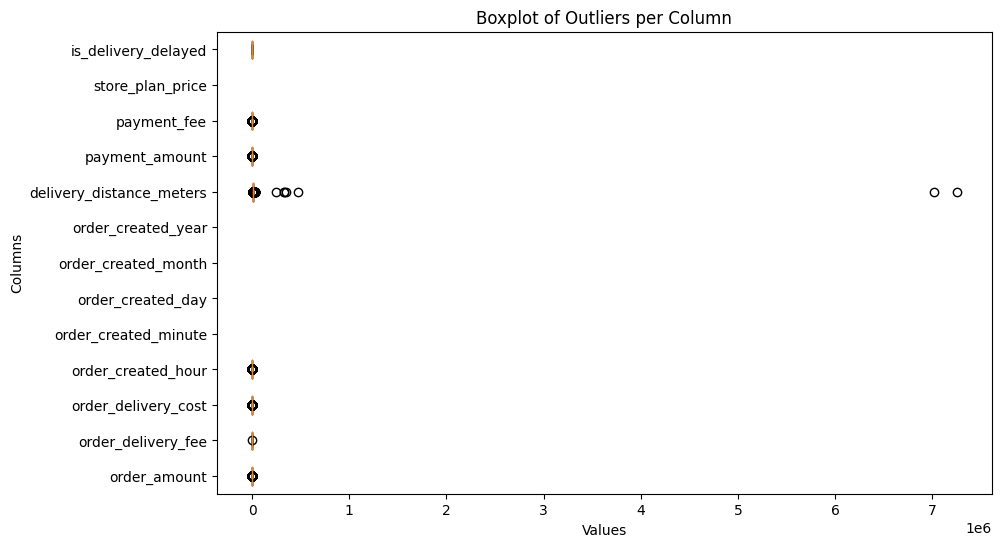

In [ ]:
# Select only columns of type float64 or int64
numeric_cols = orders_records_df.select_dtypes(include=['float64', 'int64'])

# Prepare a list to store outliers for each column
outliers_list = []

# Iterate over the numeric columns
for col in numeric_cols.columns:
    # Calculate the IQR of the column
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

    # Add the values of the outliers found to the list
    outliers_list.append(outliers[col].values)

# Plot boxplots for each column with outliers
plt.figure(figsize=(10, 6))
plt.boxplot(outliers_list, labels=numeric_cols.columns, vert=False)
plt.title('Boxplot of Outliers per Column')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

Now, there are some important insights we can collect from the boxplot. **First, let's check the attributes with outliers**:
  * *payment_amount* have only a few outliers, anyway, we'll check below
  * *delivery_distance_meters* have several outliers, so let's also check

In [ ]:
# Calculate the IQR of the 'payment_amount' column
Q1 = orders_records_df['payment_amount'].quantile(0.25)
Q3 = orders_records_df['payment_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_sorted_payment_amount = outliers.sort_values(by='payment_amount', ascending=False)

# Display the outliers
display(outliers_sorted_payment_amount.head())

# Shape
outliers_sorted_payment_amount.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,store_plan_price,is_delivery_delayed
25485,703.20,11.9,14.00,14,37,27,3,2021,721.0,715.10,19.31,0.0,1
25590,703.20,11.9,14.00,14,37,27,3,2021,721.0,715.10,19.31,0.0,1
120451,613.00,9.9,0.00,21,59,11,4,2021,2591.0,622.90,9.34,49.0,1
271466,555.75,11.9,6.98,16,38,2,1,2021,4649.0,567.65,15.33,0.0,1
352723,540.00,0.0,8.75,21,2,31,1,2021,3344.0,540.00,8.10,49.9,1


(7581, 13)

In [ ]:
# Calculate the IQR of the 'delivery_distance_meters' column
Q1 = orders_records_df['delivery_distance_meters'].quantile(0.25)
Q3 = orders_records_df['delivery_distance_meters'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_sorted_delivery_distance_meters = outliers.sort_values(by='delivery_distance_meters', ascending=False)

# Display the outliers
display(outliers_sorted_delivery_distance_meters.head())

# Shape
outliers_sorted_delivery_distance_meters.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,store_plan_price,is_delivery_delayed
289974,51.9,8.99,30.49,16,12,12,3,2021,30307.0,60.89,0.00,49.9,1
256511,9.5,15.90,3.70,23,13,1,2,2021,16886.0,25.40,0.51,29.0,1
256513,9.5,15.90,20.03,23,17,1,2,2021,15540.0,25.40,0.51,29.0,1
366217,30.0,0.00,17.74,20,22,31,3,2021,14808.0,30.00,0.45,49.0,1
256512,9.5,15.90,4.00,23,15,1,2,2021,14361.0,25.40,0.51,29.0,1


(7581, 13)

The quantity of rows from *payment_amount* and *delivery_distance_meters* are the same. So, the higher is the distance, the higher the price. So... they are outliers but they're also correct values. **So, let's keep it.**


Now, we'll check the attributes that have "no boxplot":
  * *order_created_year*, *order_created_month*, *order_created_day* and *order_created_minute* **are columns with values well defined (year always 2021, month from 1 to 12, day from 1 to 31 and minute from 0 to 60)**
  * *store_plan_price* we need to check what exactly is happening to understand why the boxplot is "empty"

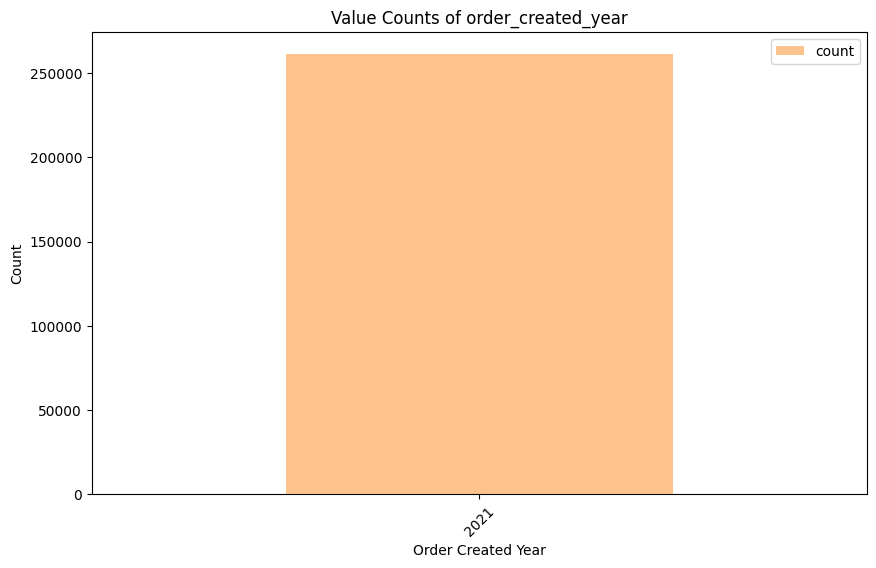

In [ ]:
# Count Values
value_counts = orders_records_df.value_counts('order_created_year')

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(value_counts)))

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color = colors)
plt.title('Value Counts of order_created_year')
plt.xlabel('Order Created Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

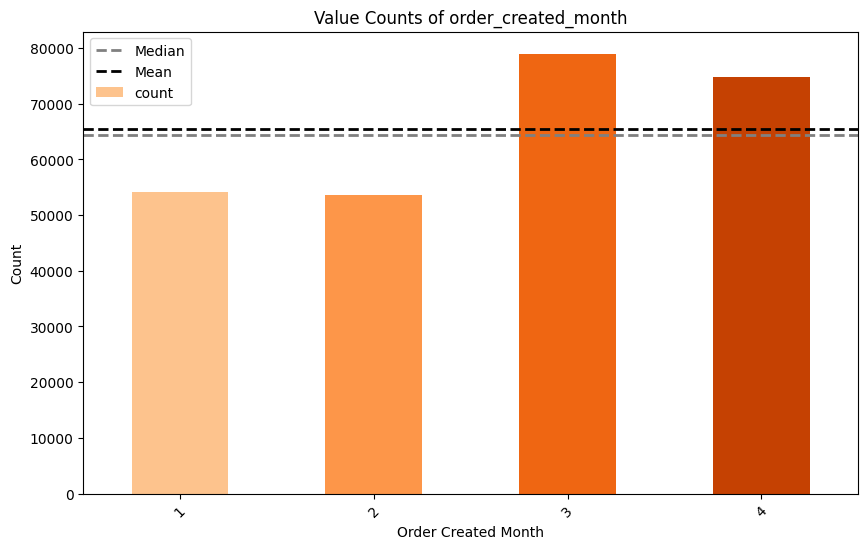

In [ ]:
# Count Values
value_counts = orders_records_df.value_counts('order_created_month')

# Order by index
value_counts = value_counts.sort_index()

# Calculating median and mean
median_value = value_counts.median()
mean_value = value_counts.mean()

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(value_counts)))

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color = colors)
plt.title('Value Counts of order_created_month')
plt.xlabel('Order Created Month')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding median and mean lines
plt.axhline(median_value, color='grey', linestyle='--', linewidth=2, label='Median')
plt.axhline(mean_value, color='black', linestyle='--', linewidth=2, label='Mean')

plt.legend()
plt.show()

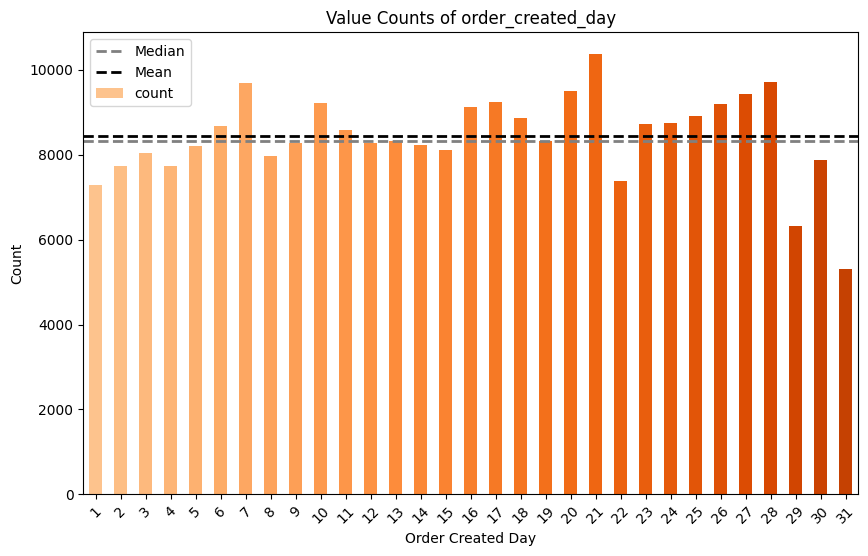

In [ ]:
# Count Values
value_counts = orders_records_df.value_counts('order_created_day')

# Order by index
value_counts = value_counts.sort_index()

# Calculating median and mean
median_value = value_counts.median()
mean_value = value_counts.mean()

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(value_counts)))

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('Value Counts of order_created_day')
plt.xlabel('Order Created Day')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding median and mean lines
plt.axhline(median_value, color='grey', linestyle='--', linewidth=2, label='Median')
plt.axhline(mean_value, color='black', linestyle='--', linewidth=2, label='Mean')
plt.legend()

plt.show()

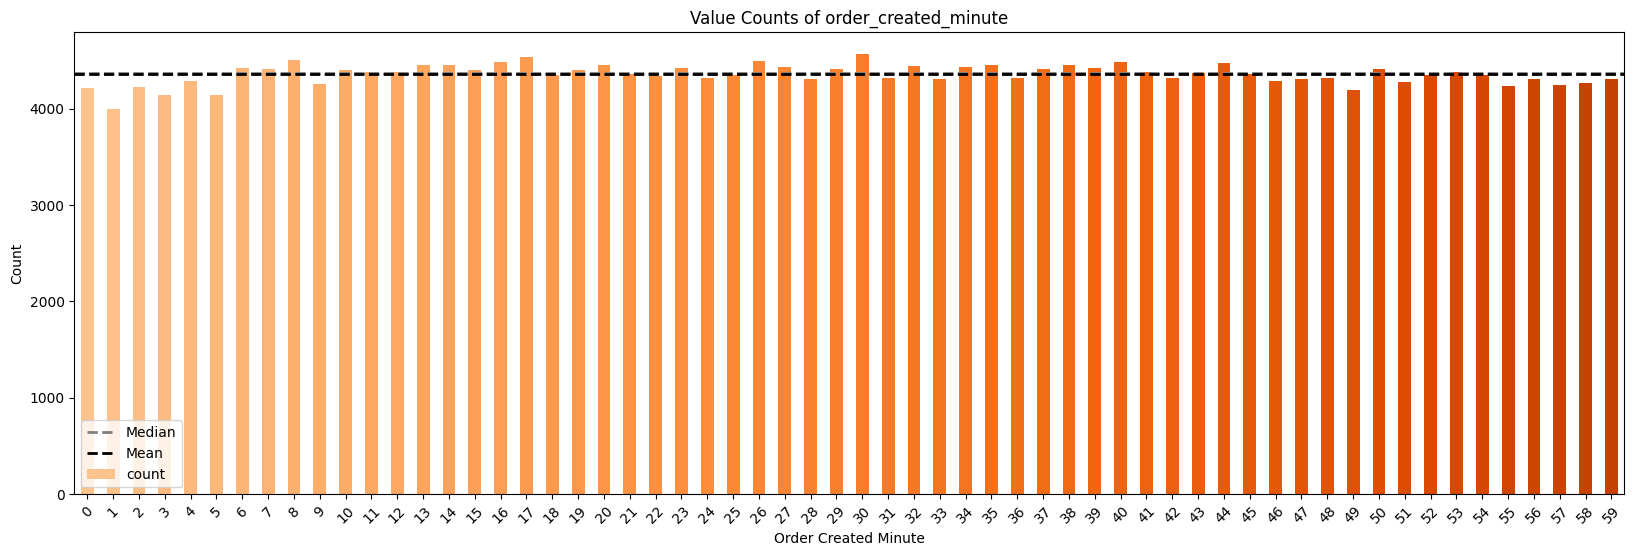

In [ ]:
# Count Values
value_counts = orders_records_df.value_counts('order_created_minute')

# Order by index
value_counts = value_counts.sort_index()

# Calculating median and mean
median_value = value_counts.median()
mean_value = value_counts.mean()

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(value_counts)))

# Plot
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('Value Counts of order_created_minute')
plt.xlabel('Order Created Minute')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding median and mean lines
plt.axhline(median_value, color='grey', linestyle='--', linewidth=2, label='Median')
plt.axhline(mean_value, color='black', linestyle='--', linewidth=2, label='Mean')

# Show legend
plt.legend()

plt.show()

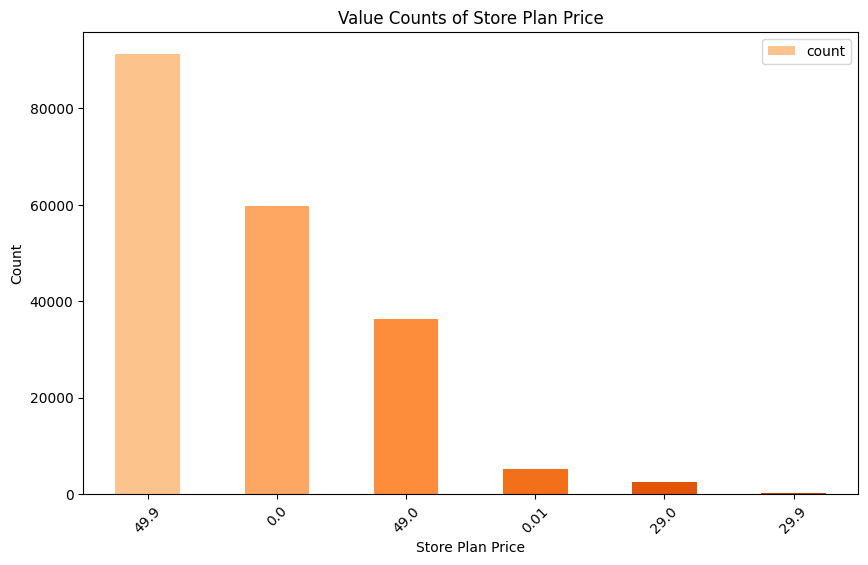

In [ ]:
# Count Values
value_counts = orders_records_df.value_counts('store_plan_price')

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(value_counts)))

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('Value Counts of Store Plan Price')
plt.xlabel('Store Plan Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

With the charts above we can check that the values are always the same, that is why the boxplot is "empty". So, everything is set.

#### 2.1.7 Null, NaNs and Missings
Let's apply the Nulls and NaNs treatment. Usually these treatments are done before the business rules applications, but, since after the applications we'll have less attributes to analyze, we are performing after.

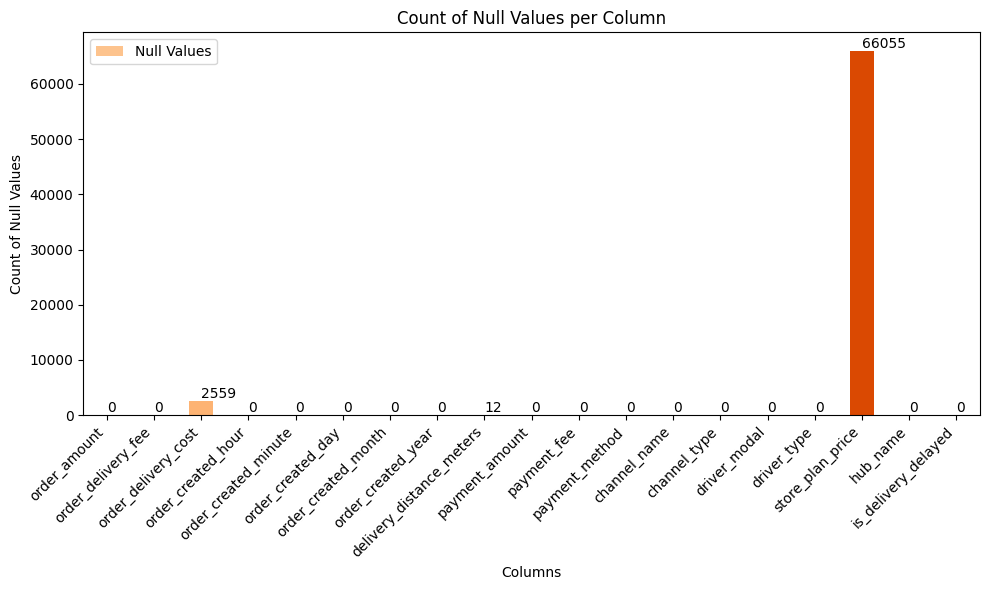

In [ ]:
# Check status of nulls in the columns
null_counts = orders_records_df.isnull().sum()

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(null_counts)))

# Plot
plt.figure(figsize=(10, 6))
bars = null_counts.plot(kind='bar', color=colors)

plt.title('Count of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')

# Adding legend
plt.legend(['Null Values'])

# Adding labels to the bars
for i, bar in enumerate(bars.patches):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()

Now, we'll go deeper into each attribute.

In [ ]:
# Order delivery Cost
orders_records_df[(orders_records_df['order_delivery_cost'].isnull())]

# Here, let's consider the NaN values as the average of all delivery cost
# Find mean of order delivery cost
mean_delivery_cost = orders_records_df['order_delivery_cost'].mean()

# Replace the NaN values with the mean
orders_records_df['order_delivery_cost'].fillna(mean_delivery_cost, inplace=True)

In [ ]:
# Delivery Distance Meters
orders_records_df[(orders_records_df['delivery_distance_meters'].isnull())]

# Since there are only 12 values, let's drop the instances
orders_records_df = orders_records_df.dropna(subset=['delivery_distance_meters'])

The *store_plan_price* have simular data, but, since we don't have further information of why is empty and there is no pattern in the NaN values, we'll choose to drop this column for the model be more precise. In addition, the c

In [ ]:
# Drop columns
orders_records_df = orders_records_df.drop('store_plan_price', axis=1)

# Check status of nulls in the columns
orders_records_df.isnull().sum()

order_amount                0
order_delivery_fee          0
order_delivery_cost         0
order_created_hour          0
order_created_minute        0
order_created_day           0
order_created_month         0
order_created_year          0
delivery_distance_meters    0
payment_amount              0
payment_fee                 0
payment_method              0
channel_name                0
channel_type                0
driver_modal                0
driver_type                 0
hub_name                    0
is_delivery_delayed         0
dtype: int64

In [ ]:
# Reset index from dataframe
orders_records_df = orders_records_df.reset_index(drop=True)

There is no need to transform the data types, since it is all properly set.

#### 2.1.8 Feature Engineering

In [ ]:
# Getting columns of type 'object'
object_columns = orders_records_df.select_dtypes(include=['object']).columns

# Applying one-hot encoding for each column of type 'object'
for column in object_columns:
    orders_records_df = pd.get_dummies(orders_records_df, columns=[column])

# Changing columns from bool to int
for column in orders_records_df.columns:
    if orders_records_df[column].dtype == 'bool':
        orders_records_df[column] = orders_records_df[column].astype(int)

# Viewing the DataFrame after applying one-hot encoding
display(orders_records_df.head())

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,is_delivery_delayed,payment_method_BANK_TRANSFER_DC,payment_method_CREDIT,payment_method_CREDIT_STORE,payment_method_DEBIT,payment_method_DEBIT_STORE,payment_method_INSTALLMENT_CREDIT_STORE,payment_method_MEAL_BENEFIT,payment_method_MONEY,payment_method_ONLINE,payment_method_PAYMENT_LINK,payment_method_STORE_DIRECT_PAYMENT,payment_method_VOUCHER,payment_method_VOUCHER_DC,payment_method_VOUCHER_OL,payment_method_VOUCHER_STORE,channel_name_ALL PLACE,channel_name_ATCHIN PLACE,channel_name_BERLIN PLACE,channel_name_BRAZIL PLACE,channel_name_CAICAI PLACE,channel_name_EATS PLACE,channel_name_FOOD PLACE,channel_name_FULL PLACE,channel_name_LISBON PLACE,channel_name_MADRID PLACE,channel_name_OTHER PLACE,channel_name_OWN PLACE,channel_name_PHONE PLACE,channel_name_READY PLACE,channel_name_REGISTER PLACE,channel_name_RIBA PLACE,channel_name_RONALD PLACE,channel_name_SAN PLACE,channel_name_SEARCH PLACE,channel_name_SHOPP PLACE,channel_name_SPEED PLACE,channel_name_STORE PLACE,channel_name_THINK PLACE,channel_name_VELOCITY PLACE,channel_name_WEAR PLACE,channel_name_WHATS PLACE,channel_type_MARKETPLACE,channel_type_OWN CHANNEL,driver_modal_MOTOBOY,driver_type_FREELANCE,driver_type_LOGISTIC OPERATOR,hub_name_AVENUE SHOPPING,hub_name_BEACH SHOPPING,hub_name_BLACK SHOPPING,hub_name_COFFEE SHOPPING,hub_name_COLOR SHOPPING,hub_name_FORTRAN SHOPPING,hub_name_GOLDEN SHOPPING,hub_name_GREEN SHOPPING,hub_name_HIP HOP SHOPPING,hub_name_HOTMILK SHOPPING,hub_name_PAGODE SHOPPING,hub_name_PEOPLE SHOPPING,hub_name_PHP SHOPPING,hub_name_PURPLE SHOPPING,hub_name_PYTHON SHOPPING,hub_name_R SHOPPING,hub_name_RAP SHOPPING,hub_name_REACT SHOPPING,hub_name_RIVER SHOPPING,hub_name_RUBY SHOPPING,hub_name_SAMPA SHOPPING,hub_name_SMALL SHOPPING,hub_name_SQL SHOPPING,hub_name_STAR SHOPPING,hub_name_SUBWAY SHOPPING,hub_name_WOLF SHOPPING
0,129.45,11.9,8.00,15,17,3,1,2021,1357.0,141.35,3.82,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,113.40,11.9,8.24,22,13,14,1,2021,1400.0,113.30,3.06,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,113.40,11.9,8.24,22,13,14,1,2021,1400.0,12.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,109.40,11.9,7.73,23,13,14,1,2021,6692.0,121.30,3.28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,110.80,11.9,9.32,22,23,15,1,2021,3262.0,122.70,3.31,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Changing names of columns to upper case
orders_records_df.columns = orders_records_df.columns.str.upper()

# Replace spaces with underscore
orders_records_df.columns = orders_records_df.columns.str.replace(' ', '_')

# Check if the operation was well done
orders_records_df.columns

Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'DELIVERY_DISTANCE_METERS',
       'PAYMENT_AMOUNT', 'PAYMENT_FEE', 'IS_DELIVERY_DELAYED',
       'PAYMENT_METHOD_BANK_TRANSFER_DC', 'PAYMENT_METHOD_CREDIT',
       'PAYMENT_METHOD_CREDIT_STORE', 'PAYMENT_METHOD_DEBIT',
       'PAYMENT_METHOD_DEBIT_STORE', 'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERLIN_PLACE',
       'CHANNEL_NAME_BRAZIL_PLACE', 'CHANNEL_NAME_CAICAI_PLACE',
       'CHANNEL_NAME_EATS_PLACE', 'CHANNEL_NAME_F

In [ ]:
orders_records_df.shape

(261457, 84)

#### 2.1.9 Class Imbalance Check
Class imbalance refers to the situation where the distribution of classes in the dataset is highly skewed, meaning one class (the minority class) is significantly less frequent than the others (the majority class or classes). This can pose challenges during model training, as algorithms may become biased towards predicting the majority class, leading to poor performance on the minority class. Addressing class imbalance often involves techniques such as resampling, cost-sensitive learning, or using evaluation metrics that account for imbalance, to ensure that the model learns effectively from all classes, not just the majority.

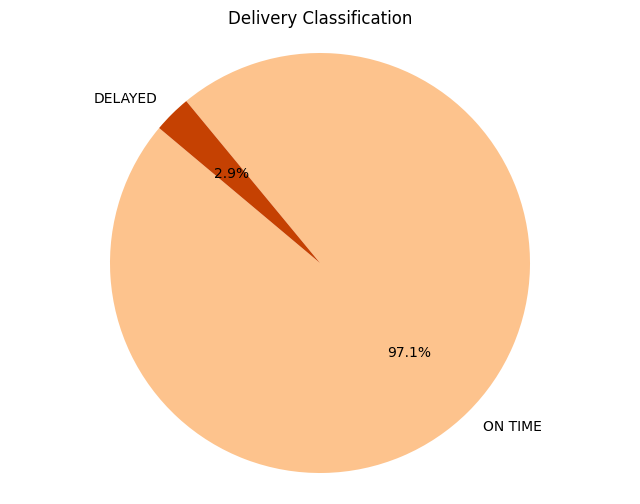

In [ ]:
# Calculating the balance of the target class
target_balance = orders_records_df['IS_DELIVERY_DELAYED'].value_counts()

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.3, 0.8, len(target_balance)))

# Define labels
labels = ['ON TIME', 'DELAYED']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(target_balance, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Delivery Classification')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()

As we can see above, there is a huge class imbalance for the target column, so, **we need to take this information in consideration while choosing the best models and algorithms**.

Now the data is set to start the machine learning model!

### 2.2 Train and Test
Now, **the dataset will be divided into train and test**. In machine learning, the training step involves feeding a model with labeled data, allowing it to learn patterns and relationships between input features and corresponding outputs. During training, the model adjusts its parameters iteratively to minimize a predefined loss function, optimizing its ability to make accurate predictions.

Once trained, the model is tested using a separate dataset (the test set) that it hasn't seen before. This step evaluates the model's performance on unseen data, assessing its ability to generalize and make accurate predictions beyond the training data. Test results help determine the model's effectiveness and whether adjustments are needed to improve its performance or generalization capabilities.

Here, it will be used the holdout division, a model evaluation technique in machine learning, where the available dataset is divided into two distinct sets: a training set and a test set. The training set is used to train the model, while the test set is withheld, or "held out," and is not used during training. After training, the model is evaluated on the test set to assess its performance on previously unseen data. This technique is crucial for verifying whether the model can generalize well to new data and to avoid overfitting.

First, let's create our variables for the train and test.

In [ ]:
# Creating a variable with the return the values in an array format
array = orders_records_df.values

# Finding the position of the target attribute
target_column_position = orders_records_df.columns.get_loc('IS_DELIVERY_DELAYED')

# Creating the variable X, with X = attributes that will be used as features (features = atributos de entrada)
X = array[:, np.r_[:target_column_position, 13:84]] # Select all instances (using ":"), but only the columns 0-11 and 13-84 (using "np.r_[:12, 13:85]")

# Creating the variable y, with y = attribute that will be used as label (or target) (label / target = atributo de saída)
y = array[:,target_column_position]

Than, let's split the data in train and test. We'll use 20% as test `test_size = 0.20` and define a seed to ensure that the data will be properly splited `random_state = 7`. Increasing the size of `test_size` will result in a less accurate code, but it will be more performant (for general testing purposes, it's a good idea to use high values of test_size).

**NOTE: THE DATASET IS TOO BIG (261.457 INSTANCES), THE TEST SIZE (`test_size`) IS GOING TO BE 0.9 DUE THE LACK OF COMPUTATIONAL RESOURCES.**

In [ ]:
# Dividing the model into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=7)

# Transform the data to be able to perform the cross validation
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Getting the number of instances and attributes for the training and test sets
print(f"Number of instances and attributes for the training data: {X_train.shape}")
print(f"Number of instances and attributes for the test data: {X_test.shape}")

Number of instances and attributes for the training data: (26145, 82)
Number of instances and attributes for the test data: (235312, 82)


### 2.3 Feature Selection
**Feature selection is the process of selecting a subset of the original features from a dataset that are most relevant to the specific problem being addressed, for htis project, let's check if we could reduce some features to improve the models performance, mitigate overfitting, reduce training time, and enhance interpretability by eliminating irrelevant, redundant, or detrimental features.** This process can be accomplished through various techniques, including statistical methods, heuristic approaches, and model-based strategies. Essentially, feature selection streamlines and optimizes the modeling process by retaining only the most crucial features for predicting or elucidating the target variable.

Some methods of feature selection include:

* Univariate selection
* Recursive feature elimination (RFE)
* Feature importance

For this, since there are multiple variables (cagorical and numerical), we'll use the feature importance.

In the feature importance analysis, machine learning algorithms such as Random Forest or Extra Trees are employed to estimate the importance of attributes, thereby conducting a preliminary selection. It's also possible to perform feature selection intrinsically, using algorithms that automatically select attributes as part of the model training process (for example, linear regression with Lasso regularization and decision trees). Since there is a classification problem, the main algorithms that could be used here are:

  * Decision Tree
  * Random Forest
  * Gradient Boosting Machines

In [ ]:
# Creation of model to select the features (this model doesn't accepts BOOL)
model = RandomForestClassifier(n_estimators = 100)
model.fit(X, y)

# Show original features
print("\nOriginal Features:", orders_records_df.columns[0:83])

# Show importance score for each feature (the higher, the more important is)
for feature, importance in zip(orders_records_df.columns[0:83], model.feature_importances_):
    print(f"{feature}: {importance}")


Original Features: Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'DELIVERY_DISTANCE_METERS',
       'PAYMENT_AMOUNT', 'PAYMENT_FEE', 'IS_DELIVERY_DELAYED',
       'PAYMENT_METHOD_BANK_TRANSFER_DC', 'PAYMENT_METHOD_CREDIT',
       'PAYMENT_METHOD_CREDIT_STORE', 'PAYMENT_METHOD_DEBIT',
       'PAYMENT_METHOD_DEBIT_STORE', 'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERLIN_PLACE',
       'CHANNEL_NAME_BRAZIL_PLACE', 'CHANNEL_NAME_CAICAI_PLACE',
       'CHANNEL_NAME_EATS_PLA

Now, we'll create a threshold to selec the best features.

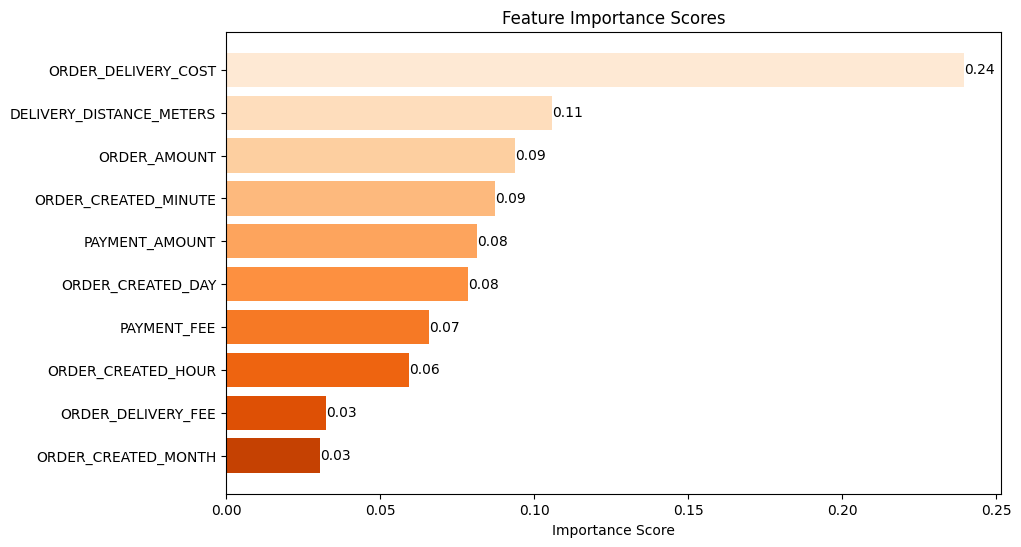

In [ ]:
# Thresh hold (according to results above)
threshold = 0.02

# Selected Featured
selected_features = [feature for feature, importance in zip(orders_records_df.columns[0:83], model.feature_importances_) if importance > threshold]

# Extract scores of selected features
selected_features_scores = [importance for importance in model.feature_importances_ if importance > threshold]

# Sort selected features and their scores by importance score
sorted_features_scores = sorted(zip(selected_features, selected_features_scores), key=lambda x: x[1], reverse=True)
sorted_features, sorted_scores = zip(*sorted_features_scores)

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.1, 0.8, len(selected_features)))

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_scores, color=colors)
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')

# Add labels to each bar
for bar, score in zip(bars, sorted_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}',
             va='center', ha='left', fontsize=10)

# Invert y-axis to show the most important feature on top
plt.gca().invert_yaxis()

plt.show()

The next step is to create a new dataframe with the selected features.

In [ ]:
# Create new dataframe
selected_orders_records_df = orders_records_df[selected_features]

# Adding target column
selected_orders_records_df['IS_DELIVERY_DELAYED'] = orders_records_df['IS_DELIVERY_DELAYED']

## 3 Modeling and Training

In machine learning, Modeling and Training is where algorithms learn from data to make predictions. It involves selecting the right algorithm, preprocessing data, and fine-tuning parameters. The goal is to find a balance between complexity and generalization. It's an iterative process of experimentation and refinement, essential for deploying accurate models in real-world applications.

### 3.1 Cross Validation
For this project **it make sense to use the cross validation**.
Its main goal is to estimate how well the model will generalize to unseen data, i.e., data that were not used during the model training. The basic procedure involves dividing the available dataset into smaller subsets, called "folds." One of these subsets is retained as test data for model evaluation, while the others are used as training data. This process is repeated several times, with each subset being used as the test set in different iterations. There are various cross-validation strategies, with k-fold cross-validation being one of the most common. In this approach, the data is divided into k subsets (folds), and the training and evaluation process is repeated k times, each time using a different fold as the test set and the remaining as the training set. At the end of the k iterations, performance metrics are calculated, including:
  * Accuracy - Measures the proportion of correct predictions made by the model relative to the total predictions. It is a simple and widely used metric but may not be suitable for imbalanced datasets, where one class is much more frequent than the other.
  * Precision - Measures the proportion of true positives (correct predictions of the positive class) relative to the total examples classified as positive by the model. It is useful when correctly identifying positives is a priority, and false positives are undesirable.
  * Recall - Measures the proportion of true positives relative to the total examples of the positive class in the dataset. It is useful when identifying all positive examples is crucial, and having some false positives is tolerable.
  * F1-score - Harmonic mean of precision and recall. It provides a balance between precision and recall, useful when there is a class imbalance or when both false positive and false negative rates are important.
  * ROC Curve (Receiver Operating Characteristic Curve) - Graphical representation of the true positive rate (sensitivity) versus the false positive rate (1 - specificity) for different classification thresholds. AUC-ROC is a metric that quantifies the model's discriminative ability to distinguish between classes. A higher AUC-ROC value indicates a better-performing classification model.
  
These metrics are calculated for each test fold. The average of these metrics is then used as an estimate of the model's performance on the dataset as a whole. Cross-validation is an important technique to ensure that the model is robust and generalizes well to new data, as well as to help avoid issues such as overfitting and underfitting.

The first part is to define the number of partitions (folds) for the cross-validation. Here, we should define it according to the number of instances we have in our dataset. Let's apply 10 partitions since we have only 261457 instances in our dataset. In addition `shuffle=True`, the data will be shuffled and the seed will be 7 (`random_state=7`).


**NOTE: SINCE THE DATASET IS TOO BIG (261.457 INSTANCES), THE NUMBER OF PARTITIONS (`num_partitions`) IS GOING TO BE REDUCED TO 3 DUE THE LACK OF COMPUTATIONAL RESOURCES.**

In [ ]:
selected_orders_records_df.shape

(261457, 11)

In [ ]:
# Defining the number of folds for the cross validation
num_partitions = 3 # MUDAR PARA 10, AGORA 3 APENAS PARA RODAR MAIS RÁPIDO

# Create an object to perform the cross validation
kfold = KFold(n_splits=num_partitions, shuffle=True, random_state=7)

**Since the objective of this project is to forecast delivery delays, empowering businesses to anticipate and address potential setbacks ahead of time,** the evaluation metric that is going to be used to select the best algorithms are `accuracy` and `recall`. The reason for this choice is because **we need to measure the quantity of correct classifications in general with accuracy (since is binary classification problem, it should be the main metric) and the recall will show if the model is predicting properly when the deliveries are delayed (to antecipate and address potential setbacks, for example).**

#### 3.1.1 Base Line Algorithms
First of all, let's **create our models using the "base line" of the algorithms (without any transformations).**


In [ ]:
# Random seed
np.random.seed(7)

# List to store the models
models = []

# Creating the models and adding them to the models list
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Setting base classifier parameters for BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating models for VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating ensembles and adding them to the models list
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Lists to store results
results = []
names = []

# Model evaluation
for name, model in models:
    # Accuracy and recall evaluation
    cv_accuracy_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_recall_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')

    # Calculating mean accuracy and recall
    accuracy_mean = cv_accuracy_results.mean()
    accuracy_std = cv_accuracy_results.std()
    recall_mean = cv_recall_results.mean()
    recall_std = cv_recall_results.std()

    # Storing results
    results.append((accuracy_mean, accuracy_std, recall_mean, recall_std))
    names.append(name)

    # Printing accuracy and recall
    accuracy_msg = "%s Accuracy: %f (%f)" % (name, accuracy_mean, accuracy_std)
    print(accuracy_msg)

    recall_msg = "%s Recall: %f (%f)" % (name, recall_mean, recall_std)
    print(recall_msg)

LR Accuracy: 0.971046 (0.002021)
LR Recall: 0.000000 (0.000000)
KNN Accuracy: 0.970740 (0.002055)
KNN Recall: 0.002743 (0.003880)
CART Accuracy: 0.950851 (0.001914)
CART Recall: 0.303281 (0.024158)
NB Accuracy: 0.820348 (0.002075)
NB Recall: 0.596142 (0.012888)
SVM Accuracy: 0.971123 (0.001914)
SVM Recall: 0.000000 (0.000000)
Bagging Accuracy: 0.974641 (0.001399)
Bagging Recall: 0.233660 (0.012411)
RF Accuracy: 0.972232 (0.002029)
RF Recall: 0.056917 (0.002445)
ET Accuracy: 0.971276 (0.001272)
ET Recall: 0.034048 (0.012331)
Ada Accuracy: 0.972538 (0.002677)
Ada Recall: 0.139387 (0.024911)
GB Accuracy: 0.973723 (0.001689)
GB Recall: 0.182139 (0.010215)
Voting Accuracy: 0.971123 (0.001914)
Voting Recall: 0.000000 (0.000000)


#### 3.1.2 Standardized and Normalized Algorithms
Now, we'll **perform the standardization and normalization of the algorithms**. Just as the previous step, the evaluation metric that will be used is going to be accuracy, because the target column (the one we want to predict) is binary.

In [ ]:
# Random seed
np.random.seed(7)

# List to store the models
pipelines = []

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-stand', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-stand', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-stand', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-stand', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-stand', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-stand', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-stand', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-stand', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-stand', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-stand', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-stand', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Lists to store results
results = []
names = []

# Model evaluation
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s Accuracy: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

    # Calculate and print recall
    recall_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    recall_msg = "%s Recall: %.3f (%.3f)" % (name, recall_results.mean(), recall_results.std()) # formatando para 3 casas decimais
    print(recall_msg)

LR-orig Accuracy: 0.971 (0.002)
LR-orig Recall: 0.000 (0.000)
KNN-orig Accuracy: 0.971 (0.002)
KNN-orig Recall: 0.003 (0.004)
CART-orig Accuracy: 0.951 (0.002)
CART-orig Recall: 0.303 (0.024)
NB-orig Accuracy: 0.820 (0.002)
NB-orig Recall: 0.596 (0.013)
SVM-orig Accuracy: 0.971 (0.002)
SVM-orig Recall: 0.000 (0.000)
Bag-orig Accuracy: 0.975 (0.001)
Bag-orig Recall: 0.234 (0.012)
RF-orig Accuracy: 0.972 (0.002)
RF-orig Recall: 0.057 (0.002)
ET-orig Accuracy: 0.971 (0.001)
ET-orig Recall: 0.034 (0.012)
Ada-orig Accuracy: 0.973 (0.003)
Ada-orig Recall: 0.139 (0.025)
GB-orig Accuracy: 0.974 (0.002)
GB-orig Recall: 0.182 (0.010)
Vot-orig Accuracy: 0.971 (0.002)
Vot-orig Recall: 0.000 (0.000)
LR-stand Accuracy: 0.971 (0.002)
LR-stand Recall: 0.015 (0.007)
KNN-stand Accuracy: 0.970 (0.002)
KNN-stand Recall: 0.024 (0.007)
CART-stand Accuracy: 0.951 (0.002)
CART-stand Recall: 0.289 (0.017)
NB-stand Accuracy: 0.086 (0.053)
NB-stand Recall: 0.961 (0.022)
SVM-stand Accuracy: 0.971 (0.002)
SVM-stan

### 3.2 Selecting Model
With analysis above from the 3 main models, since most of the models showed basically the same results among original, normalized and standardized and, according to the results of the cross validation, the models that are going to be tested are: **Bagging, Decision Tree, and AdaBoost**.

Firstly, considering original preprocessing means keeping the data in its raw form, without any transformation. This means we are working with the original characteristics and distributions of the data, which can be crucial for certain machine learning algorithms.

Bagging (Bootstrap Aggregating) is an ensemble technique that combines multiple machine learning models, trained on different subsets of data created by sampling with replacement. This approach helps to reduce variance and improve model stability, which can be beneficial for achieving high accuracy and recall on diverse datasets.

Decision Tree is a machine learning algorithm that partitions the data into subsets based on feature values and creates a tree-like structure of decisions. Each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents a class label. Decision trees are easy to interpret and can handle both numerical and categorical data.

Lastly, AdaBoost (Adaptive Boosting) is an ensemble algorithm that iteratively adjusts the weights of data instances, giving more focus to misclassified instances in each iteration. This allows the model to focus on the most difficult areas of the dataset, which can be particularly useful for improving recall, ensuring that positive instances are accurately identified.

By choosing algorithms with original preprocessing, we are leveraging the intrinsic characteristics of the data without introducing distortions through transformations. This can be advantageous in certain scenarios, especially when the original features of the data are relevant to the classification task.

First of all, let's train now our new dataset with the new features (found in feature selection, section 2.3)

In [ ]:
# Shape of new dataset
selected_orders_records_df.shape

(261457, 11)

In [ ]:
# Creating a variable with the return the values in an array format
array = selected_orders_records_df.values

# Creating the variable X, with X = attributes that will be used as features (features = atributos de entrada)
X = array[:, 0:10]

# Creating the variable y, with y = attribute that will be used as label (or target) (label / target = atributo de saída)
y = array[:, 10]

**NOTE: THE DATASET IS TOO BIG (261.457 INSTANCES), THE TEST SIZE (`test_size`) IS GOING TO BE 0.9 DUE THE LACK OF COMPUTATIONAL RESOURCES.**

In [ ]:
# Dividing the model into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=7) # MUDAR O TEST_SIZE PARA 0.20 (agora 0.90), AGORA APENAS PARA SER MAIS PERFORMÁTICO

# Transform the data to be able to perform the cross validation
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Getting the number of instances and attributes for the training and test sets
print(f"Number of instances and attributes for the training data: {X_train.shape}")
print(f"Number of instances and attributes for the test data: {X_test.shape}")

Number of instances and attributes for the training data: (26145, 10)
Number of instances and attributes for the test data: (235312, 10)


#### 3.2.1 Bagging
Bagging is an ensemble learning technique that involves training multiple instances of a base learner (typically decision trees) on different subsets of the training data, sampled with replacement (bootstrap sampling). The final prediction is often determined by averaging the predictions of all the individual models. Bagging helps reduce variance and overfitting by combining the predictions of multiple models trained on different subsets of data.

In [ ]:
# Selecting a random seed
np.random.seed(7)

# Creating the Bagging model
bagging_model = BaggingClassifier(base_estimator=None, n_estimators=num_trees, max_features=max_features)

# Training the Bagging model with the training set
bagging_model.fit(X_train, y_train)

# Making predictions with the test set
y_pred = bagging_model.predict(X_test)

# Calculating evaluation metrics on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9714676684571972
Precision: 1.0
F1: 0.032285961372153366
Recall: 0.016407852329329037
ROC AUC: 0.5082039261646645


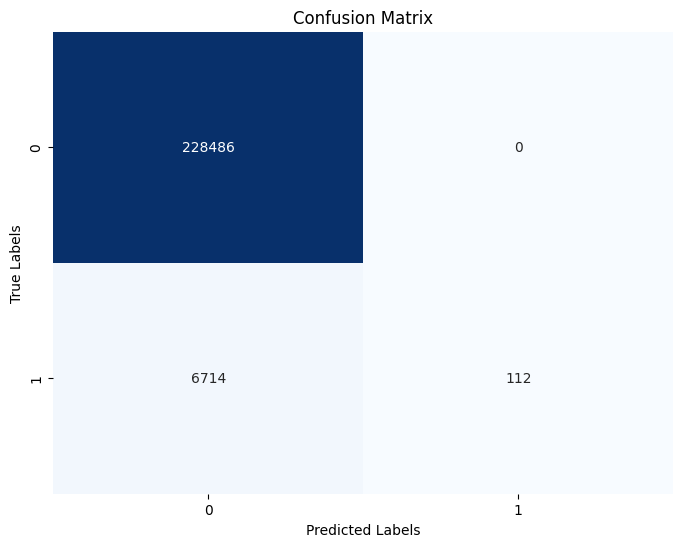

In [ ]:
# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Calculate the confusion matrix using the true labels (y_test) and the model predictions (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 3.2.2 Decision Tree
Decision Tree is a versatile and widely used supervised learning algorithm used for both classification and regression tasks. It works by partitioning the input space into regions, each associated with a specific class or value. The algorithm builds a tree-like structure where each internal node represents a decision based on the input features, and each leaf node represents the predicted class or value. Decision Trees are easy to interpret and visualize, making them popular choices for tasks where understanding the model's reasoning is important. They are robust to outliers and can handle both numerical and categorical data. However, they can be prone to overfitting, especially with complex datasets, which can be mitigated using techniques like pruning or ensemble methods. Overall, Decision Trees offer a simple yet powerful approach to supervised learning tasks.

In [ ]:
# Selecting a random seed
np.random.seed(7)

# Creating the Decision Tree model
dt_model = DecisionTreeClassifier()

# Training the Decision Tree model with the training set
dt_model.fit(X_train, y_train)

# Making predictions with the test set
y_pred_dt = dt_model.predict(X_test)

# Calculating evaluation metrics on the test set
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("F1:", f1_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))

Accuracy: 0.9509799755218603
Precision: 0.20769708255741776
F1: 0.22485048047846248
Recall: 0.24509229416935246
ROC AUC: 0.6085803023502068


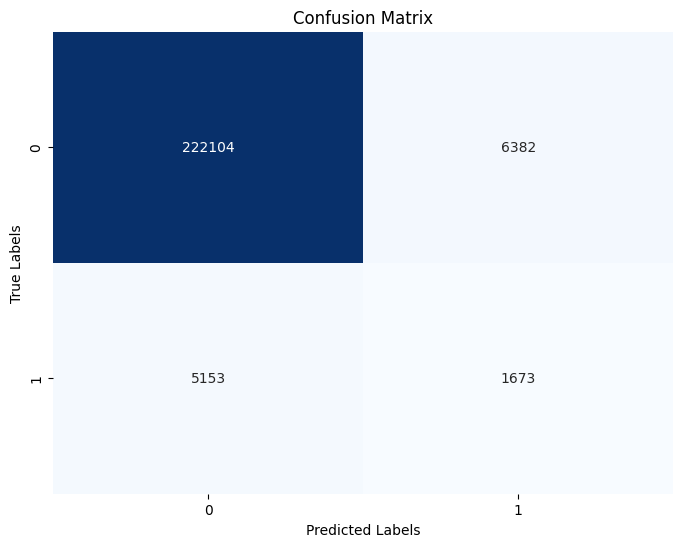

In [ ]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the confusion matrix using the true labels (y_test) and the model predictions (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 3.2.3 Ada Boost
AdaBoost is an ensemble learning technique that combines multiple weak learners (often decision trees) to create a strong learner. In AdaBoost, each weak learner is trained sequentially, with each subsequent learner focusing more on the instances that were misclassified by the previous ones. The final prediction is typically determined by a weighted sum of the predictions of all the weak learners. AdaBoost iteratively improves the model's performance by giving more weight to the misclassified instances, effectively reducing bias and improving generalization.

In [ ]:
# Selecting a random seed
np.random.seed(7)

# Creating the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=num_trees)

# Training the AdaBoost model with the training set
ada_model.fit(X_train, y_train)

# Making predictions with the test set
y_pred = ada_model.predict(X_test)

# Calculating evaluation metrics on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9740769701502686
Precision: 0.7312101910828025
F1: 0.27346355407336825
Recall: 0.1681804863756226
ROC AUC: 0.5831667730408439


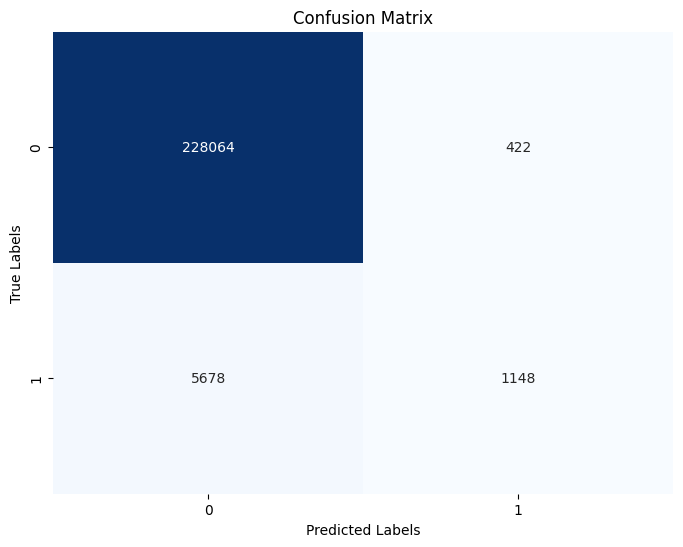

In [ ]:
# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Calculate the confusion matrix using the true labels (y_test) and the model predictions (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### 3.2.4 Choosing Final Model

In order to achieve a balance between high accuracy and high recall, it's essential to consider both precision and recall metrics across different classification techniques.

Reviewing the provided results:

- **Bagging:** It exhibits high accuracy (0.971), but a very low recall (0.016). This suggests that it correctly identifies positives when making predictions but misses many actual positives.

- **Decision Tree (DT):** It has a smaller accuracy (0.950) but a more substantial recall (0.245).

- **AdaBoost:** It has slightly higher accuracy (0.974) and lower recall (0.168) compared to RF.

If prioritizing maximizing recall while maintaining a good accuracy, and, taking advantage that the Deicion Tree has a sensitive hyperparameter to adjust the class weight (`class_weight `), **we'll choose to continue with the Decision Tree**.

### 3.3 Underfitting and Overfitting
When a machine learning model fits the training data very well but has difficulty predicting unseen data, the model is memorizing and not learning the patterns, which is an overfitting problem. Now, when a model is too simple to understand the patterns in the data, this is called underfitting and it seems that the model doesn't have either problem.

  * Overfitting: In an overfitting scenario, it's common for the model to have high recall on the training data because it's fitting well to them, but lower recall on the test data. This happens because the model is adjusting to the noise and peculiarities of the training data, which doesn't translate into good performance on unseen data
  * Underfitting: In an underfitting scenario, both the recall on the training data and the test data can be low. This occurs because the model is unable to properly capture the underlying relationship between variables, resulting in poor performance on both data sets.

If the accuracies on the training and test sets are within approximately 1% or less of each other, you can consider the model to be generalizing well to new data. If the difference is greater than that, it may be necessary to investigate possible causes, such as overfitting or underfitting, and make adjustments to the model.

In [ ]:
# Selecting a random seed
np.random.seed(7)

# Making predictions on training and test sets
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

# Calculating accuracy and recall on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

# Calculating the percentage difference between accuracies and recalls
accuracy_difference = abs(train_accuracy - test_accuracy) / max(train_accuracy, test_accuracy) * 100
recall_difference = abs(train_recall - test_recall) / max(train_recall, test_recall) * 100

# Comparing accuracies
print("Accuracy from training:", train_accuracy)
print("Accuracy from test:", test_accuracy)

# Comparing recalls
print("Recall from training:", train_recall)
print("Recall from test:", test_recall)

# Printing the percentage difference
print("Accuracy percentage difference:", accuracy_difference,"%")
print("Recall percentage difference:", recall_difference,"%")

Accuracy from training: 1.0
Accuracy from test: 0.9509799755218603
Recall from training: 1.0
Recall from test: 0.24509229416935246
Accuracy percentage difference: 4.9020024478139685 %
Recall percentage difference: 75.49077058306474 %


In the scenario described, we can take some considerations:

  * **There is a small difference between the train and test regarding `accuracy`, but in the other hand, a huge difference in the `recall` from training and from test**
  * In the analysis of feature importance, as conducted within the feature selection phase, has showed that **no instances of data leakage are evident** (when information from the test set leaks into the model during training, compromising its generalization ability, this can happen in two ways: feature leakage and target leakage)

With this, there is a huge chance that the dataset has **underfitting**. This problem could be solved by trying to adjust the hyperparameters from Decision Tree (`class_weight`).

### 3.4 Hyperparameters
Hyperparameters are externally adjustable configurations that control the behavior of the learning algorithm during the training of a machine learning model. They are not directly learned from the data but need to be set before training.

First, let's figure out what hyperparameters there are in the Decision Tree.

In [ ]:
# Creating variable
rfc = DecisionTreeClassifier()

# Printing parameters
pprint(rfc.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


Now, let's take a deep dive into the hyperparameters:
- **ccp_alpha**: Complexity parameter used for Minimal Cost-Complexity Pruning. It determines the amount of regularization applied to the decision tree by penalizing the tree based on the complexity and the cost of misclassification.

- **class_weight**: Weights associated with classes in the form `{class_label: weight}`. It is used to address class imbalance by assigning higher weights to minority classes.

- **criterion**: The function to measure the quality of a split. It can be either 'gini', which measures the impurity of the nodes using the Gini impurity, or 'entropy', which uses information gain.

- **max_depth**: The maximum depth of the decision tree. If set to None, nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

- **max_features**: The number of features to consider when looking for the best split. If set to None, it considers all features.

- **max_leaf_nodes**: The maximum number of leaf nodes in the decision tree. If set to None, it allows an unlimited number of leaf nodes.

- **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

- **min_samples_split**: The minimum number of samples required to split an internal node.

- **min_weight_fraction_leaf**: The minimum weighted fraction of the sum total of weights required to be at a leaf node.

- **random_state**: Controls the randomness of the estimator. If set to an integer, it ensures reproducibility of the results.

- **splitter**: The strategy used to choose the split at each node. It can be either 'best' to choose the best split or 'random' to choose the best random split.


The functions created below will use the cross validation to check the possibilities among some hyperparameters. In addition, it prioritize results with higher recalls (here, it could be used the `GridSearchCV` or `RandomizedSearchCV`), The difference is that the first one go for all the possibilities, the second one makes a specific number of iterations.


In [ ]:
def custom_recall_score(y_true, y_pred):
    # Calculate the recall score
    recall = recall_score(y_true, y_pred)

    # Return the recall score
    return recall

def optimize_recall(X_train, X_test, y_train, y_test):
    # Defining global variable (so we can use outside the function)
    global best_dt_model

    # Selecting a random seed
    np.random.seed(7)

    # Define the hyperparameters to be tuned
    param_grid = {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2, 3],
        'class_weight': ['balanced', None]
    }

    # Initialize the DecisionTree classifier
    dt_model = DecisionTreeClassifier(random_state=42)

    # Define the custom scoring function
    custom_scorer = make_scorer(custom_recall_score)

    # Initialize the grid search with cross-validation using the custom scoring function
    grid_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, n_iter=10, cv=3, scoring=custom_scorer, random_state=42, n_jobs=-1)

    # Perform the grid search to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Get the model with the best hyperparameters
    tunned_dt_model = grid_search.best_estimator_

    # Train the model with the best hyperparameters
    tunned_dt_model.fit(X_train, y_train)

    # Make predictions
    y_pred = tunned_dt_model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print best model and best score
    print('BEST MODEL PARAMETERS:')
    print(tunned_dt_model.get_params())
    print('The score:', grid_search.best_score_)

    # Print performance metrics
    print("BEST PERFORMANCE METRICS:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)

    # Return the best model
    return tunned_dt_model


In [ ]:
# Applying the function
optimize_recall(X_train, X_test, y_train, y_test)

BEST MODEL PARAMETERS:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
The score: 0.4993149096734754
BEST PERFORMANCE METRICS:
Accuracy: 0.7021231386414633
Precision: 0.05628804667994502
F1 Score: 0.10273937532002048
Recall: 0.5878992089071199
ROC AUC: 0.6467173889130016


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=4,
                       random_state=42)

Let's take a look in the results before and after the adjustments:
Before Hyperparameter Adjustment:
- **Accuracy:** 0.951
- **Precision:** 0.208
- **Recall:** 0.245

After Hyperparameter Adjustment:
- **Accuracy:** 0.702
- **Precision:** 0.056
- **Recall:** 0.588

Before the hyperparameter adjustment, the model exhibited high accuracy (0.951) but relatively low recall (0.245) and moderate precision (0.208). The focus on the adjustment was to improve recall while recognizing the potential trade-off with precision.

The adjustment significantly improved recall to 0.588, indicating a substantial enhancement in identifying positive instances. However, this improvement came at the expense of precision, which dropped to 0.056, leading to more false positives.

Consequently, the overall accuracy decreased to 0.702 post-adjustment, reflecting the model's increased tolerance for false positives. Nevertheless, the prioritization of recall suggests that the model is now more effective in capturing positive instances, which could be advantageous in scenarios where maximizing recall is crucial, even at the cost of reduced precision and accuracy.

The hyperparameter adjustment successfully improved recall, demonstrating the model's enhanced ability to identify positive instances. However, this improvement was accompanied by a decrease in precision and overall accuracy. The decision to prioritize recall over precision should consider the specific requirements and objectives of the application.






With the results above, **the accuracy and precision results are worse than before**, but, **the recall is now higher**. Since the accuracy is not low and the recall is higher, the final outputs are better than before. So, the adjustments were properly completed.

## 4 Result Evaluation
In the Result Evaluation stage, the trained model undergoes testing with unseen data to assess its real-world performance. This evaluation is critical to check how well the model generalizes to new, unseen instances. Additionally, the model is often retrained using the entire dataset to maximize its learning potential before deployment. Through this process, we validate the model's efficacy, identify any potential shortcomings, and ensure its readiness for practical application.

For this analysis, as written before, **the main evaluation metrics will be `ACCURACY`, `RECALL` and `PRECISION`**. The reason for this choice is because **we need to measure the quantity of correct classifications in general with accuracy (since is binary classification problem, it should be the main metric) and the recall will show if the model is predicting properly when the deliveries are delayed (to antecipate and address potential setbacks, for example).**

### 4.1 Training All Dataset
In this step, we'll are going to train all data set with our model and check the results.

In [ ]:
# Selecting a random seed
np.random.seed(7)

# Preparing the final model
tunned_dt_model = DecisionTreeClassifier(ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='gini',
                                         max_depth=10,
                                         max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_samples_leaf=3,
                                         min_samples_split=4,
                                         min_weight_fraction_leaf=0.0,
                                         random_state=42,
                                         splitter='best')

# Training the Decision Tree model with the training set
tunned_dt_model.fit(X, y)

# Making predictions with the test set
y_pred = tunned_dt_model.predict(X)

# Calculating evaluation metrics on the test set
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("ROC AUC:", roc_auc_score(y, y_pred))

Accuracy: 0.8004260738859544
Precision: 0.0953564753488541
F1: 0.1676503429574095
Recall: 0.6931803192191004
ROC AUC: 0.748404431143685


Now, for a better visualization, let's plot into a bar chart.

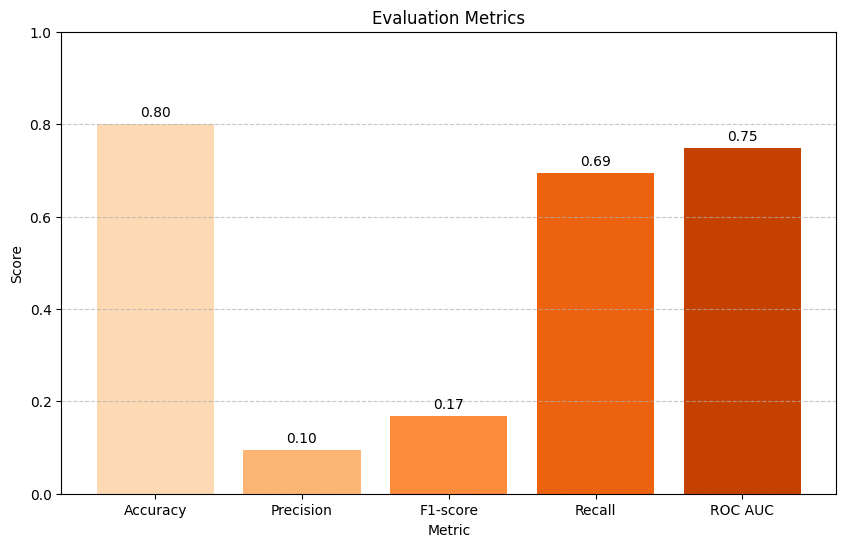

In [ ]:
# Metrics and their values
metrics = ['Accuracy', 'Precision', 'F1-score', 'Recall', 'ROC AUC']
scores = [accuracy_score(y, y_pred),
          precision_score(y, y_pred),
          f1_score(y, y_pred),
          recall_score(y, y_pred),
          roc_auc_score(y, y_pred)]

# Generating shades of orange
colors = plt.cm.Oranges(np.linspace(0.2, 0.8, len(metrics)))

# Creating the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, scores, color=colors)

# Adding labels to the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.01,
             f'{score:.2f}',
             ha='center',
             va='bottom')

plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')

# Setting the y-axis range from 0 to 1 for percentage metrics
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The results above **makes total sense** according to the tested ones from the previous session. With this, let's take a deep dive on them:
Interpretation:

- **Accuracy**: Represents the proportion of correctly classified instances out of the total instances. In this case, the model achieves an accuracy of approximately 80.04%, which is quite high.

- **Precision**: Precision is the proportion of true positive predictions out of all positive predictions made by the model. A low precision indicates a high number of false positives. In this case, the precision is approximately 9.54%, which suggests that when the model predicts a positive outcome, it's correct only around 9.54% of the time.

- **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It's particularly useful when the class distribution is imbalanced. Here, the F1 score is approximately 16.77%.

- **Recall**: Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified by the model. A low recall indicates a high number of false negatives. The recall here is approximately 69.32%.

- **ROC AUC**: ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate against the false positive rate. AUC (Area Under the Curve) measures the entire two-dimensional area underneath the ROC curve from (0,0) to (1,1). It provides an aggregate measure of performance across all possible classification thresholds. An AUC of 0.7484 indicates that the model has moderate discriminatory power.

Interpreting these metrics collectively, the model seems to have decent overall accuracy, but it may struggle with precision, indicating a high number of false positives. The recall is relatively better, suggesting that the model is better at capturing true positives. The F1 score provides a balance between precision and recall, which is useful when the class distribution is imbalanced. Finally, the ROC AUC indicates moderate discriminative power of the model across different classification thresholds.

#### 4.1.1 Confusion Matrix
A confusion matrix is a fundamental tool in evaluating the performance of a classification model. It provides a comprehensive breakdown of predicted versus actual class labels, enabling a deeper understanding of the model's strengths and weaknesses.

The matrix is structured into four quadrants:

1. True Positives (TP): Instances where the model correctly predicts a positive class.
2. True Negatives (TN): Instances where the model correctly predicts a negative class.
3. False Positives (FP): Instances where the model incorrectly predicts a positive class (Type I error).
4. False Negatives (FN): Instances where the model incorrectly predicts a negative class (Type II error).

By analyzing the values in each quadrant, we can derive various performance metrics such as accuracy, precision, recall (sensitivity), specificity, and F1 score. These metrics provide valuable insights into the model's predictive capabilities and its ability to discriminate between classes.

In summary, the confusion matrix serves as a cornerstone in result evaluation, offering a clear and concise depiction of a classification model's performance across different class labels.


In [ ]:
# Make predictions on the test set
y_pred = tunned_dt_model.predict(X)

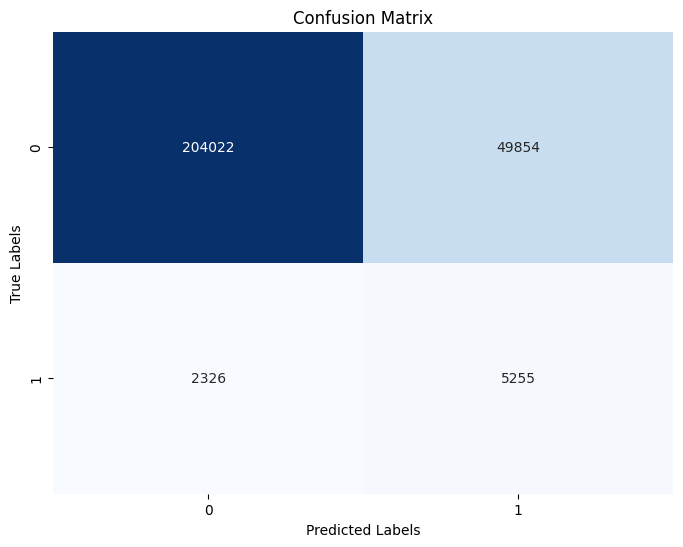

In [ ]:
# Calculate the confusion matrix using the true labels (y) and the model predictions (y_pred)
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix is a table that shows the performance of a classification model in terms of true positives, false positives, true negatives, and false negatives.

  * In the top-left cell (204022), we have the number of examples correctly classified as negatives (true negatives, TN).
  * In the top-right cell (49854), we have the number of examples incorrectly classified as positives (false positives, FP).
  * In the bottom-left cell (2326), we have the number of examples incorrectly classified as negatives (false negatives, FN).
  * In the bottom-right cell (5255), we have the number of examples correctly classified as positives (true positives, TP).


**Interpreting the numbers:**

  * The model correctly classified 204,022 examples as negatives.
  * The model incorrectly classified 49,854 examples as positives when they were actually negatives.
  * The model correctly classified 5,255 examples as positives.
  * The model incorrectly classified 2,326 examples as negatives when they were actually positives.
  * This matrix provides a detailed view of the model's performance, allowing you to assess where it is succeeding and where it is failing in classifying instances.

#### 4.1.2 ROC and AUC Curve
The Receiver Operating Characteristic (ROC) curve is a graphical representation of a binary classification model's performance across different thresholds. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

**The ROC curve visually demonstrates the trade-off between recall (true positive rate) and specificity (true negative rate)**. A model with perfect discrimination would have an ROC curve that passes through the upper-left corner, indicating high sensitivity and specificity.

Key points about the ROC curve:

- The closer the ROC curve is to the upper-left corner, the better the model's performance.
- The diagonal line represents random guessing, where the area under the curve (AUC) would be 0.5.
- The area under the ROC curve (AUC) quantifies the model's overall performance, with higher values indicating better discrimination.

In summary, the ROC curve is a valuable tool for evaluating and comparing classification models, providing insights into their ability to discriminate between classes across various threshold settings.


In [ ]:
# Making probability predictions on the test set
y_scores = tunned_dt_model.predict_proba(X)[:, 1]  # Probabilities of positive class

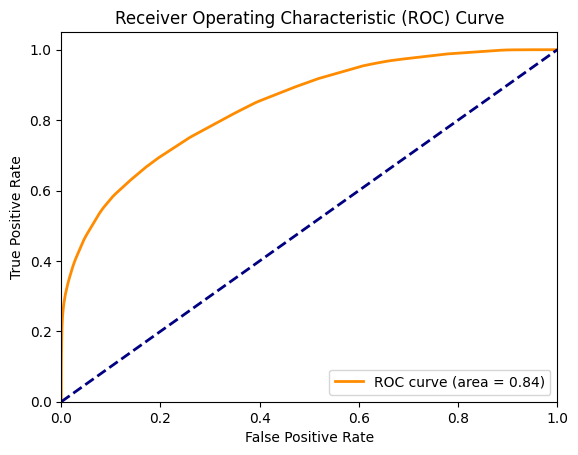

0.8409005836951989


In [ ]:
# Calculating curve ROC
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot curve ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print
print(roc_auc)

The value of 0.8409 indicates that your model performs well in discriminating between positive and negative classes. An ROC AUC of 0.5 indicates a model that is as good as a random model, while a value of 1 indicates a perfect model. Therefore, a value of 0.8409 suggests that the model is performing significantly better than a random classifier.

#### 4.1.3 Precision and Recall Tradeoff
The precision and recall tradeoff is a fundamental concept in binary classification models, representing the balance between precision and recall (or sensitivity).

- Precision: Precision measures the accuracy of positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives. A high precision indicates that the model makes few false positive predictions.

- Recall (Sensitivity): Recall measures the model's ability to identify all positive instances correctly. It is calculated as the ratio of true positives to the sum of true positives and false negatives. A high recall indicates that the model captures a large proportion of positive instances.

The precision and recall tradeoff arises from the inverse relationship between precision and recall. Increasing one metric often leads to a decrease in the other. This tradeoff highlights the importance of finding the right balance between minimizing false positives (high precision) and capturing all positive instances (high recall).

In practical terms, adjusting the classification threshold can affect the precision-recall tradeoff. Lowering the threshold typically increases recall but decreases precision, while raising the threshold has the opposite effect.

Understanding the precision and recall tradeoff is crucial for optimizing model performance and making informed decisions about threshold selection in classification tasks.


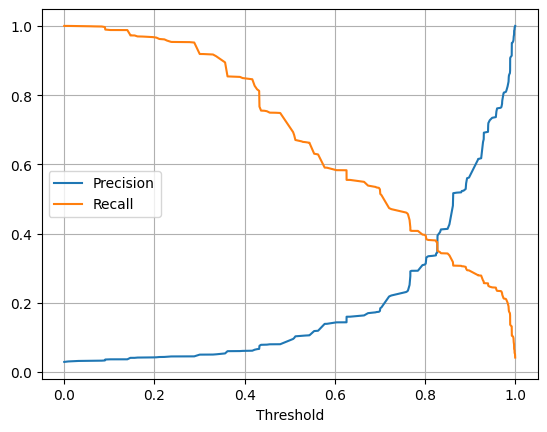

In [ ]:
# Calculating prevision, recall and threshold
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

# Plot
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

In this project, **It's preferable to receive some delay alerts that turn out to be false than not to receive alerts about deliveries that will actually be delayed**, as real delays can have more significant consequences such as financial penalties, customer dissatisfaction, or operational issues. Therefore, **it's acceptable to have slightly lower precision as long as the recall is high enough to capture most of the true delays**. This can help ensure that necessary measures are taken to deal with the actual delays and minimize their impact

### 4.2 Training with Unseen Data
To complete, we'll check the model with unseen data to check how it goes.

In [ ]:
# Unseen data
data = {
    'ORDER_AMOUNT': [55.80, 156, 102, 75, 120],
    'ORDER_DELIVERY_FEE': [0.00, 9.80, 6.00, 7.20, 8.00],
    'ORDER_DELIVERY_COST': [8.98, 7.20, 4.50, 5.60, 6.00],
    'ORDER_CREATED_HOUR': [18, 10, 13, 21, 16],
    'ORDER_CREATED_MINUTE': [45, 20, 55, 10, 30],
    'ORDER_CREATED_DAY': [3, 20, 12, 5, 15],
    'ORDER_CREATED_MONTH': [3, 3, 5, 6, 7],
    'DELIVERY_DISTANCE_METERS': [4675, 2000, 800, 1500, 100],
    'PAYMENT_AMOUNT': [55.80, 160.50, 105, 78.50, 123.50],
    'PAYMENT_FEE': [0.84, 12.75, 2.75, 2.00, 3.20]
}

# Creating attributes
attributes = ['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST', 'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY', 'ORDER_CREATED_MONTH',
              'DELIVERY_DISTANCE_METERS', 'PAYMENT_AMOUNT', 'PAYMENT_FEE']

# Creating dataframe
input = pd.DataFrame(data, columns=attributes)

# Transforming to array
array_input = input.values
X_input = array_input[:,0:10].astype(float)

# Checking the data
print(X_input)

[[55.80 0.00 8.98 18.00 45.00 3.00 3.00 4675.00 55.80 0.84]
 [156.00 9.80 7.20 10.00 20.00 20.00 3.00 2000.00 160.50 12.75]
 [102.00 6.00 4.50 13.00 55.00 12.00 5.00 800.00 105.00 2.75]
 [75.00 7.20 5.60 21.00 10.00 5.00 6.00 1500.00 78.50 2.00]
 [120.00 8.00 6.00 16.00 30.00 15.00 7.00 100.00 123.50 3.20]]


In [ ]:
# Prediction
output = tunned_dt_model.predict(X_input)
print(output)

[1.00 0.00 0.00 0.00 0.00]


**Evaluation of the model trained on random data, where only the first instance is delayed, demonstrates its remarkable accuracy in predicting the target.** According to the results, out of a sample of 5 orders, one is projected to experience delays. This insight equips the company with valuable information to devise proactive action plans and communicate effectively with clients, thereby elevating the overall customer experience

### 4.3 Conclusion
In conclusion, this machine learning project successfully tackled the challenge of predicting delivery delays within a snowflake schema dataset derived from real delivery data in Brazil. By applying business rules to determine delay classifications, the project addressed a crucial aspect of logistics optimization.

Employing a supervised classification approach, **the project encountered the common issue of class imbalance, which was effectively managed through various techniques... like selecting the better model to deal with it and changing the hyperparameters**. Notably, **feature selection was one of the main steps in streamlining the dataset, reducing it from over 84 attributes** to a concise set of 10 features plus the target variable. **This drastic reduction of almost 90% not only streamlined computational resources but also improved model interpretability and generalization.**

In addition, since **the biggest problem is the quantity of instances and the lack of computational resources**, because of this, it was needed to use a big test sice (0.9) so we can run the notebook properly. **Knowing this, the results also could  be better if it was used a smaller test size (0.2 up to 0.3).**

Overall, the project underscores the importance of well done feature selection in managing complex datasets, especially within the realm of logistics where efficiency and accuracy are paramount. By leveraging machine learning techniques and addressing practical business challenges, this endeavor contributes valuable insights towards optimizing delivery processes in real-world scenarios.

### 4.4 Self Assessment
In reflecting on my machine learning project, **I am proud of the meticulous documentation that I have maintained throughout the process**. Clear documentation is essential for reproducibility and knowledge transfer, and I believe it will serve as a valuable resource for future iterations of this project and for others in the field.

While the project yielded valuable insights, I acknowledge that **the results could have been improved, particularly in terms of precision**. Given the critical importance of accurately predicting delivery delays, achieving a higher precision score is a priority. This realization highlights the need for further refinement in model tuning and feature engineering to enhance predictive performance.

Navigating the **trade-offs among accuracy, recall, and precision proved to be a significant challenge**. Striking the right balance among these metrics is crucial for optimizing model performance, and **I recognize the importance of fine-tuning this balance to meet specific project objectives.**

In hindsight,** I acknowledge that more emphasis on exploratory data analysis (EDA) could have led to better insights and, ultimately, improved final results**. While the primary focus was on implementing machine learning algorithms, investing additional effort in EDA could have uncovered hidden patterns or relationships within the data, leading to more informed modeling decisions.

Despite the challenges encountered, **my passion for data science has only deepened throughout this project**. The process of grappling with real-world data and working through complex challenges has fueled my enthusiasm for the field, motivating me to continue learning and refining my skills as a data scientist. This project has served as a valuable learning experience, reinforcing my commitment to driving innovation and solving real-world problems through data-driven approaches.






